In [ ]:
# 결측치[missing value] : 누락된 값, 비어있는 값
# 원인: 휴먼에러, 진짜 결측 등. 꼭 생각해봐야 한다.
# NA값 해결하는 두 가지 방법 1. NA 날리기 (기준치 설정 후)   2. NA 채우기

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                  '성적':[100,80,np.nan],
                  '등급':['A',np.nan,'B']})
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [4]:
#결측치 확인하는 법
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

In [10]:
# 결측치 제거하는 법
df.dropna(subset = ['성적'], inplace = True)
    # .dropna() 결측치가 존재하는 행 삭제
    # subset = ['원하는 변수명']
    # inplace 원본에 반영하고 싶을 때
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN


In [7]:
df.dropna() #전체 모든 na 값을 다 제거한다. 

,이름,성적,등급
0,홍길동,100.0,A


In [12]:
df.성적.sum() #na값 제외하고 합쳐진다. 

180.0

In [16]:
df['성적']+100 # 성적 열 데이터마다 100씩 더하기, NA값은 반영 안됨

0    200.0
1    180.0
2      NaN
Name: 성적, dtype: float64

In [38]:
df.성적.mean() # NA갑 제외하여 평균 값 구하기

90.0

In [ ]:
# 숫자열 데이터 타입에서 NaN 값은 제외되어 계산됨

In [26]:
df.이름.value_counts().sum()

3

In [28]:
df.등급.value_counts().sum() # 문자열데이터, 범주형데이터 NAN 값도 계산이 안됨

2

In [30]:
df.shape # 전체 데이터프레임의 행과 열은 3,3 나오지만 실제 컬럼을 기준으로 들어가서 값을 계산시에는 NA값은 제외됨.

(3, 3)

In [5]:
exam = pd.read_csv('csv/exam.csv')

In [21]:
# NaN값을 NA값으로 바꾸고 싶을 때
exam.loc[[3,8,9,15],['english']] = np.nan
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [23]:
# NA값을 반영하지 않은 평균값
exam.english.mean()

81.625

In [26]:
# .fillna() - NA값을 대체하는 값을 넣고 싶을 때 (0을 집어 넣는 경우)

In [25]:
exam = pd.read_csv('exam.csv')

exam.loc[[3,8,9,15],['english']] = np.nan

exam['english'] = exam['english'].fillna(0)
exam.english.mean() # NA값을 0으로 대체하여 평균값에 변동이 있음

# 이처럼 변동이 있을 수 있기 때문에 결측치를 대체할 때 올바른 판단이 필요
# 머신러닝 학습에도 이 차이를 염두에 두어야 함
# 결측치를 어떻게 대처하는냐에 따라 머신러닝의 평가 지표가 달라질 수 있음

65.3

In [28]:
exam = pd.read_csv('exam.csv')

exam.loc[[3,8,9,15],['english']] = np.nan

exam['english'] = exam['english'].fillna(81.6)
exam.english.mean()

81.62

In [ ]:
# 이상치 (anomaly)
# 두 가지 이상치: 정상적인 이상치 / 논리적이지 않은 이상치
# EX: 고객 장바구니 데이터 주문 금액이 마이너스 (반품?)
# 이상치 또한 올바른 판단하에 대처해야 함
# IQR을 기준으로 이상치 탐색
# IQR - 1사분위수와 3사분위수의 거리를 나타낸 것

In [36]:
mpg = pd.read_csv('mpg.csv')
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<AxesSubplot:ylabel='cty'>

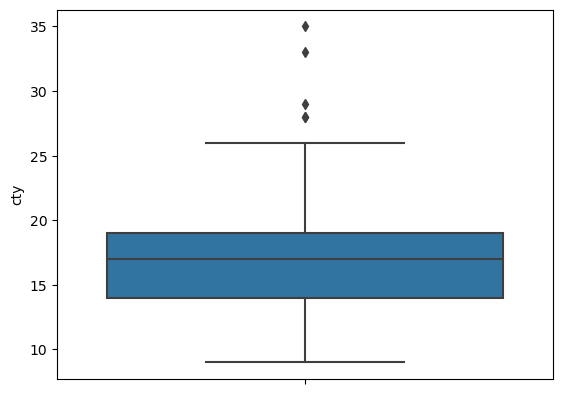

In [35]:
import seaborn as sns
sns.boxplot(data=mpg , y='cty') #숫자형데이터만 확인이 가능
# 아랫수염 - 0~25%, 윗수염 - 75~100%
# 상자밑선 - 1사분위수 Q1, 25%
# 상자중앙선 - 2사분위수 Q2, 중앙값 50%
# 상자윗선 - 3사분위수 Q3, 75%
# 극단치 - 윗수염 경계 위에 위치한 값, Q1과 Q3 밖 1.5IQR을 넘어가는 값

In [34]:
# IQR 극단치 기준값 구해보기
# 분위수 만들기, quantile()사용

p25 = mpg['cty'].quantile(0.25)
p25

14.0

In [33]:
p75 = mpg['cty'].quantile(0.75)
p75

19.0

In [37]:
iqr = p75- p25 
iqr

5.0

In [38]:
# 하한선 구하는 공식

p25 - 1.5*iqr

6.5

In [39]:
# 상한선 구하는 공식

p75 + 1.5*iqr

26.5

In [40]:
# 극단치 데이터 값
np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5))

(array([ 99, 196, 212, 221, 222], dtype=int64),)

In [42]:
# 극단치로 판별된 값 NA로 대체
mpg['cty']=np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5), np.nan, mpg['cty'])

In [43]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [44]:
# NA값 삭제

mpg_1 = mpg.dropna()
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

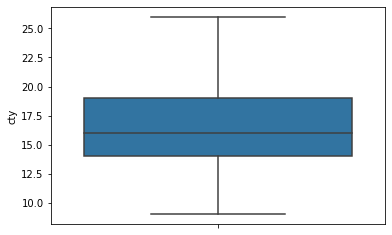

In [74]:
# 극단치 제거 후 데이터 시각화
# 극단치가 삭제됨을 확인할 수 있음

sns.boxplot(data=mpg_1,y='cty')

In [46]:
mpg_1.cty.mean() #이상치 제거 후 평균값

16.558951965065503

In [45]:
mpg.cty.mean() #이상치 제거 전 평균값

16.558951965065503

In [79]:
# 컬럼을 이용해서 열단위 추출
mpg['cty']

0      18
1      21
2      20
3      21
4      16
       ..
229    19
230    21
231    16
232    18
233    17
Name: cty, Length: 234, dtype: int64

In [80]:
# 행단위 추출하는 법 loc, iloc
# loc - 인덱스를 기준으로 행 데이터 추출
# iloc - 행 번호를 기준으로 행 데이터 추출

mpg.loc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [82]:
mpg.loc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [83]:
mpg.iloc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [84]:
mpg.iloc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [47]:
mpg_sp =mpg.loc[[0,2,4,6,8]]
mpg_sp

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18.0,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16.0,25,p,compact


In [48]:
mpg_sp.loc[4] #인덱스기준 

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                 16.0
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

In [1]:
# mpg_sp.iloc[6]
# iloc 행 번호 순서를 넘어가면 안 된다.

In [100]:
for i in range(10):
    print(mpg.loc[i])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object
manufacturer          audi
model                   a4
displ                  1.8
year                  1999
cyl                      4
trans           manual(m5)
drv                      f
cty                     21
hwy                     29
fl                       p
category           compact
Name: 1, dtype: object
manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                     31
fl                       p
category           compact
Name: 2, dtype: object
manufacturer        audi
model                 a4
displ       